# **OBJETIVOS DO ESTUDO**

# **VERIFICAR A EFICACIA DA HIALURONIDADE**

* **DICIONARIO DE DADOS**
* **ESTATISTICAS DESCRITIVAS DE CADA VARIAVEL (COM ANALISE TEXTUAL)**
* **ESTATISTICA DE DIAS VARIÁVEIS (COM ANALISE TEXTUAL)**
* **CONCLUSÃO**

# **1° Passo: Importar bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **2° Passo: Importar dataset**

In [2]:
df = pd.read_excel('./hialuronidase.xlsx','Dados')

# **3° Passo: Análise inicial do dataset**

# **5 primeiros e ultimos dados**

In [3]:
df

,ficha,lote,idade,raca,ecivil,prof,esc,gest,parid,abort,...,bishop0,bishop24,bishop48,bishop72,bishop96,bishopin,colat,cesar,indcesar,apgar
0,101,7,32,branca,cas,dolar,5,1,0,0,...,2,4.0,4.0,6.0,7.0,8,nao,nao,naplic,1
1,102,7,19,preta,solt,dolar,3,1,0,0,...,2,5.0,NaN,NaN,NaN,8,nao,nao,naplic,1
2,103,7,15,parda,solt,estudant,1,1,0,0,...,2,2.0,3.0,5.0,5.0,7,colica,nao,naplic,1
3,104,7,30,parda,cas,auxemp,3,1,0,0,...,1,NaN,NaN,NaN,NaN,3,nao,sim,DF,1
4,105,7,16,parda,cas,dolar,1,1,0,0,...,1,1.0,1.0,3.0,4.0,4,nao,nao,naplic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,284,16,30,branca,cas,auxesc,1,3,2,0,...,3,4.0,6.0,NaN,NaN,10,nao,nao,naplic,1
164,285,16,25,branca,cas,dolar,1,3,1,1,...,4,4.0,4.0,NaN,NaN,4,nao,nao,naplic,1
165,286,16,14,parda,solt,estudant,3,2,1,0,...,3,6.0,6.0,NaN,NaN,6,nao,nao,naplic,1
166,287,16,31,branca,cas,auxesc,4,2,1,0,...,3,3.0,3.0,NaN,NaN,4,nao,sim,SF,0


# **Tamanho do dataset: linhas x colunas**

In [4]:
df.shape

(168, 28)

# **Nomes das colunas, dados omissos e tipos de dados**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ficha     168 non-null    int64  
 1   lote      168 non-null    object 
 2   idade     168 non-null    int64  
 3   raca      168 non-null    object 
 4   ecivil    168 non-null    object 
 5   prof      168 non-null    object 
 6   esc       168 non-null    int64  
 7   gest      168 non-null    int64  
 8   parid     168 non-null    int64  
 9   abort     168 non-null    int64  
 10  cesant    168 non-null    object 
 11  igest     168 non-null    int64  
 12  indinduc  168 non-null    object 
 13  indtpart  168 non-null    object 
 14  tparto    168 non-null    int64  
 15  tcond     49 non-null     float64
 16  tinduc    61 non-null     float64
 17  droga     168 non-null    object 
 18  bishop0   168 non-null    int64  
 19  bishop24  157 non-null    float64
 20  bishop48  142 non-null    float6

# **Porcentagem de dados omissos em cada coluna**

In [6]:
df.isna().mean()

ficha       0.000000
lote        0.000000
idade       0.000000
raca        0.000000
ecivil      0.000000
prof        0.000000
esc         0.000000
gest        0.000000
parid       0.000000
abort       0.000000
cesant      0.000000
igest       0.000000
indinduc    0.000000
indtpart    0.000000
tparto      0.000000
tcond       0.708333
tinduc      0.636905
droga       0.000000
bishop0     0.000000
bishop24    0.065476
bishop48    0.154762
bishop72    0.392857
bishop96    0.535714
bishopin    0.000000
colat       0.000000
cesar       0.000000
indcesar    0.000000
apgar       0.000000
dtype: float64

# **4° Passo: Tratamento dos dados**

# **Remoção das colunas ficha,lote e indtpar**

# **Estas são colunas identificadores, devido a isso não podemos fazer boas analises**

In [7]:
df.drop(columns=['ficha','lote','indtpart'],inplace=True)
df

,idade,raca,ecivil,prof,esc,gest,parid,abort,cesant,igest,...,bishop0,bishop24,bishop48,bishop72,bishop96,bishopin,colat,cesar,indcesar,apgar
0,32,branca,cas,dolar,5,1,0,0,naplic,1,...,2,4.0,4.0,6.0,7.0,8,nao,nao,naplic,1
1,19,preta,solt,dolar,3,1,0,0,naplic,0,...,2,5.0,NaN,NaN,NaN,8,nao,nao,naplic,1
2,15,parda,solt,estudant,1,1,0,0,naplic,0,...,2,2.0,3.0,5.0,5.0,7,colica,nao,naplic,1
3,30,parda,cas,auxemp,3,1,0,0,naplic,0,...,1,NaN,NaN,NaN,NaN,3,nao,sim,DF,1
4,16,parda,cas,dolar,1,1,0,0,naplic,1,...,1,1.0,1.0,3.0,4.0,4,nao,nao,naplic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,30,branca,cas,auxesc,1,3,2,0,nao,0,...,3,4.0,6.0,NaN,NaN,10,nao,nao,naplic,1
164,25,branca,cas,dolar,1,3,1,1,nao,1,...,4,4.0,4.0,NaN,NaN,4,nao,nao,naplic,1
165,14,parda,solt,estudant,3,2,1,0,nao,0,...,3,6.0,6.0,NaN,NaN,6,nao,nao,naplic,1
166,31,branca,cas,auxesc,4,2,1,0,nao,1,...,3,3.0,3.0,NaN,NaN,4,nao,sim,SF,0


# **Mudando a coluna "cesária" para "tipo de parto"**

**para isso será necessário mudar o nome da coluna e seus valoes de "sim" para "cesária" e "não" para "vaginal"**

In [8]:
df.rename(columns={'cesar': 'tipo_parto'},inplace=True)
new_cesar_values = { 'sim': 'cesária','nao': 'vaginal' }
df['tipo_parto'] = df['tipo_parto'].apply(lambda x : new_cesar_values[x])

# **Preenchendo os valores nulos das colunas tcond e tinduc com suas respectivas médias**

In [9]:
df['tcond'] = df['tcond'].fillna(df['tcond'].mean())
df['tinduc'] = df['tinduc'].fillna(df['tinduc'].mean())

# **5° passo: análise exploratória de uma variavel**

# **Função genérica para calcular medidas estatisticas de variaveis quantitativas**

In [10]:
def get_numeric_stats(data):
    stats = data.describe().to_frame()
    stats.loc['Moda'] = data.mode()[0]
    stats.loc['Variância'] = data.var()
    stats.loc['Assimetria'] = data.skew()
    stats.loc['Kurtose'] = data.kurtosis()
    stats.loc['Mediana'] = data.median()
    stats.loc['Coeficiência de Variação'] = (data.std() / data.mean()) * 100
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    stats.loc['IIQ'] = Q3 - Q1
    stats.loc['Amplitude'] = data.max() - data.min()
    stats_columns_names = {
        'count':'Quantidade',
        'mean': 'Média',
        'std': 'Desvio Padrão',
        'min': 'Mínimo',
        '25%': '1° Quartil',
        '50%': '2° Quartil',
        '75%': '3° Quartil',
        'max': 'Máximo'
    }
    sorted_cols = [
        'Quantidade',
        'Média',
        'Mediana',
        'Moda',
        'Variância',
        'Desvio Padrão',
        'Coeficiência de Variação',
        'Mínimo',
        '1° Quartil',
        '2° Quartil',
        '3° Quartil',
        'Máximo',
        'Amplitude',
        'IIQ',
        'Assimetria',
        'Kurtose'
    ]
    return stats.rename(index=stats_columns_names).loc[sorted_cols]

# **Função genérica para calcular medidas estatisticas de variaveis qualitativas**

In [11]:
def get_quality_stats(data):
    stats = data.value_counts().to_frame()
    stats['Frêquencia Acumulada'] = stats['count'].cumsum()
    stats['Frêquencia Absoluta'] = stats['count'] / len(data)
    stats['Frêquencia Absoluta Acumulada'] = stats['Frêquencia Absoluta'].cumsum()
    return stats.rename(columns={'count':'Frêquencia'})

# **Função genérica para plotar gráfico de barras de variáveis qualitativas**

In [12]:
def plot_count_chart(data,column,orientation='vertical'):
    count = df[column].value_counts()
    percentage = (count / count.sum()) * 100
    if orientation == 'vertical':
        ax = sns.barplot(y=count.index, x=count.values, order=count.index)
    else:
        ax = sns.barplot(x=count.index, y=count.values, order=count.index)
    plt.xlabel('Contagem')
    for i, v in enumerate(percentage):
        ax.text(v + 0.5, i, '{:.2f}%'.format(v), color='black', va='center')
    plt.show()

# **Função genérica para plotar gráfico de pizza de variáveis qualitativas**

In [13]:
def plot_pie_chart(data,column):
    count = data[column].value_counts()
    percentage = (count / count.sum()) * 100
    plt.pie(percentage, labels=count.index, autopct='%1.1f%%', startangle=140)
    plt.show()

# **Propriedas padrões para mostrar média no boxplot**

In [14]:
default_mean_props = {
    'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'8'
}

# **Idade**

In [15]:
get_numeric_stats(df['idade'])

,idade
Quantidade,168.000000
Média,24.434524
Mediana,23.000000
Moda,21.000000
Variância,33.792094
Desvio Padrão,5.813097
Coeficiência de Variação,23.790506
Mínimo,14.000000
1° Quartil,20.000000
2° Quartil,23.000000


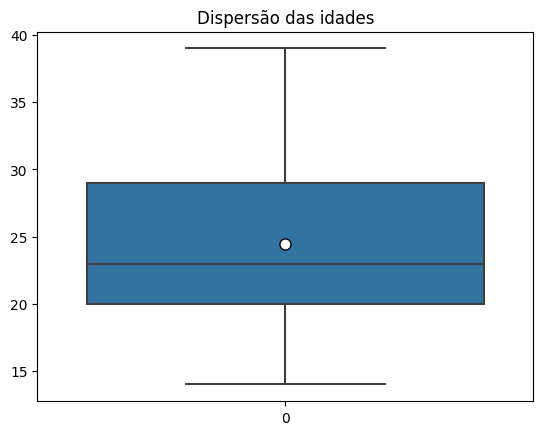

In [16]:
plt.title('Dispersão das idades')
sns.boxplot(df['idade'],showmeans=True,meanprops=default_mean_props)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


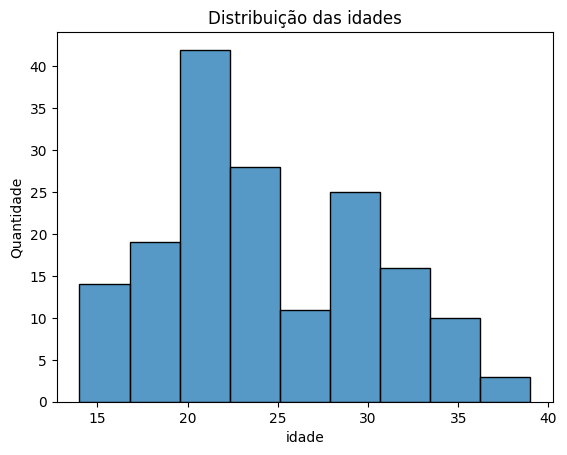

In [17]:
plt.title('Distribuição das idades')
sns.histplot(df['idade'])
plt.ylabel('Quantidade')
plt.show()

In [18]:
len(df.query('idade > 29')) / len(df)

0.23809523809523808

In [19]:
len(df.query('idade < 18')) / len(df)

0.10119047619047619

# A média das idades é de 24 anos tendo um desvio padrão de 5 anos, onde:

* A idade mínima encontrada foi de 14 anos
* 25% das mulheres tinham até 20 anos
* 50% das mulheres tinham até 23 anos
* 75% das mulheres tinham até 29 anos
* A idade máxima encontrada foi de 39 anos

**23% das mulheres tem 30 anos ou mais** 

**10% das mulheres são menores de idade**

**A idade variava 23% em torno da média**

**Nenhum outlier foi encontrado**

# **Raça**

In [20]:
get_quality_stats(df['raca'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
raca,,,,
branca,91,91,0.541667,0.541667
parda,59,150,0.351190,0.892857
preta,17,167,0.101190,0.994048
outra,1,168,0.005952,1.000000


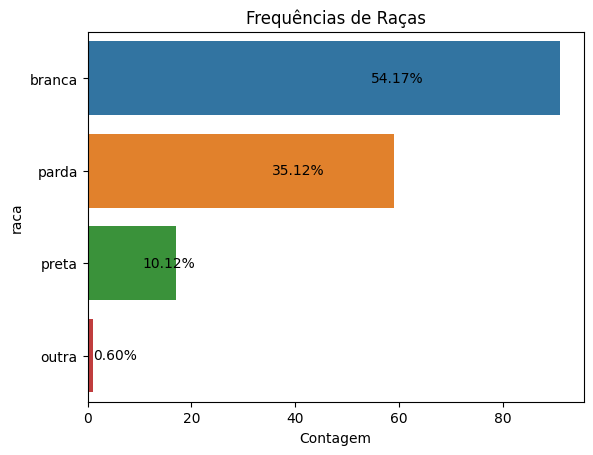

In [21]:
plt.title('Frequências de Raças')
plt.xlabel('Contagem')
plt.ylabel('Raça')
plot_count_chart(df,'raca')

**54% das mulheres entrevistadas eram brancas, 35% pardas e 10% negras apenas uma mulher foi identificada como a raça "outra"**

**90% das mulheres eram brancas ou pardas**

# **Estado Civil**

In [22]:
get_quality_stats(df['ecivil'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
ecivil,,,,
cas,135,135,0.803571,0.803571
solt,30,165,0.178571,0.982143
amas,3,168,0.017857,1.000000


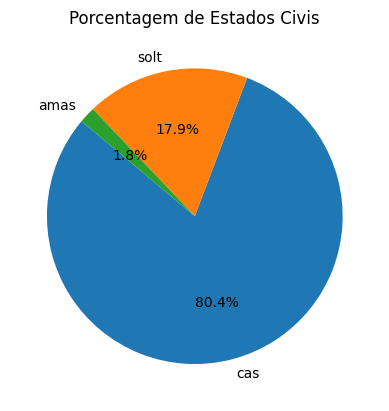

In [23]:
plt.title('Porcentagem de Estados Civis')
plot_pie_chart(df,'ecivil')

**80% das mulheres eram casadas e 18% solteiras, 1.8% tiveram seu estado civil registrado como "amas"**

**98% das mulheres são casadas ou solteiras**

# **Profissão**

In [24]:
get_quality_stats(df['prof'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
prof,,,,
dolar,104,104,0.619048,0.619048
estudant,10,114,0.059524,0.678571
domest,7,121,0.041667,0.720238
auxesc,5,126,0.029762,0.750000
cabel,3,129,0.017857,0.767857
teleoper,3,132,0.017857,0.785714
balcon,3,135,0.017857,0.803571
prof,3,138,0.017857,0.821429
cost,2,140,0.011905,0.833333


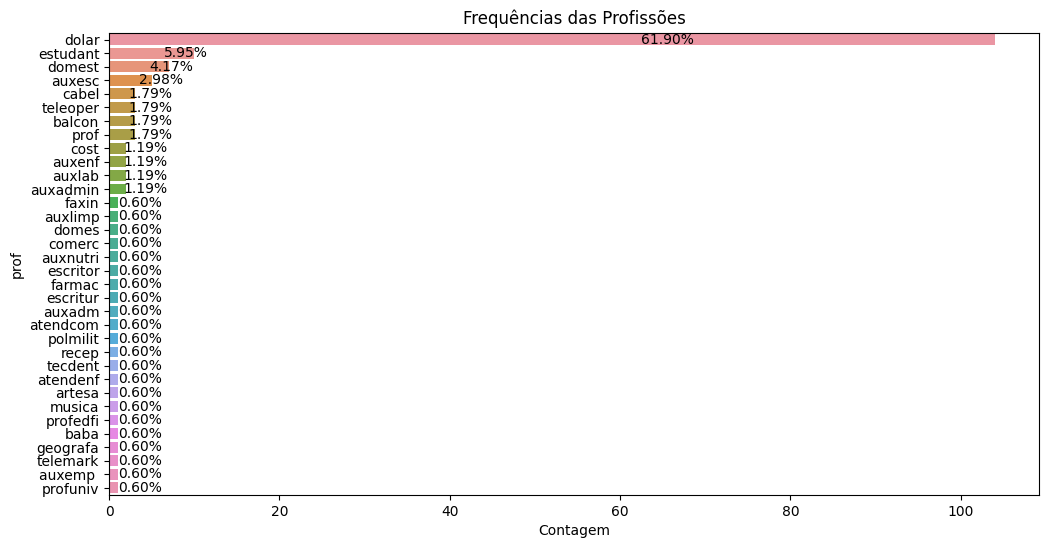

In [25]:
plt.figure(figsize=(12,6))
plt.title('Frequências das Profissões')
plt.xlabel('Contagem')
plt.ylabel('Estado Civil')
plot_count_chart(df,'prof')

**61% das mulheres exercem atividades do lar, 5% são estudantes e 4% fazem trabalho doméstico**

**as demais profissões não possuiam porcentgens significativas dentro da nossa base de dados**

**os 30% restantes das mulheres exerciam trabalhos fora de casa**

# **Escolaridade**

In [26]:
education_list = ['analfabeta','primário incompleto','primário completo','secundário incompleto','secundário completo','superior incompleto','superior completo']
df['esc_label'] = df['esc'].apply(lambda x: education_list[x])

In [27]:
get_quality_stats(df['esc_label'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
esc_label,,,,
primário incompleto,64,64,0.380952,0.380952
secundário completo,37,101,0.220238,0.601190
primário completo,29,130,0.172619,0.773810
secundário incompleto,22,152,0.130952,0.904762
superior completo,11,163,0.065476,0.970238
superior incompleto,4,167,0.023810,0.994048
analfabeta,1,168,0.005952,1.000000


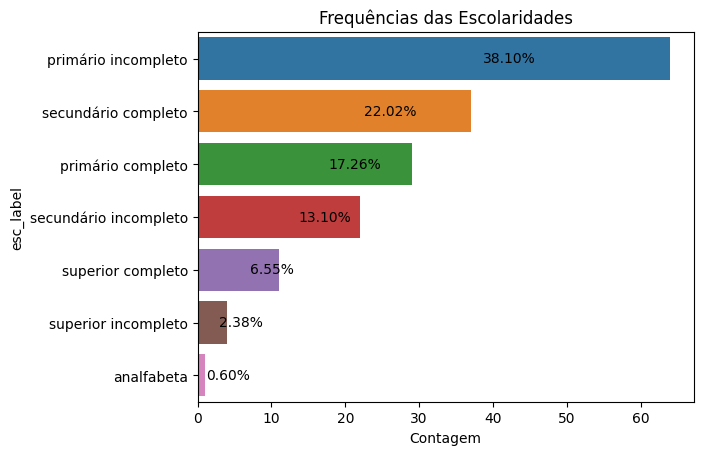

In [28]:
plt.title('Frequências das Escolaridades')
plt.xlabel('Contagem')
plt.ylabel('Escolaridade')
plot_count_chart(df,'esc_label')

**apenas 6,55% das mulheres possuem o ensino superior completo e 2% delas não completaram o ensino superior, 38% não completaram o ensino primário**

# **Gestações**

In [29]:
get_numeric_stats(df['gest'])

,gest
Quantidade,168.000000
Média,1.791667
Mediana,1.000000
Moda,1.000000
Variância,1.195858
Desvio Padrão,1.093553
Coeficiência de Variação,61.035519
Mínimo,1.000000
1° Quartil,1.000000
2° Quartil,1.000000


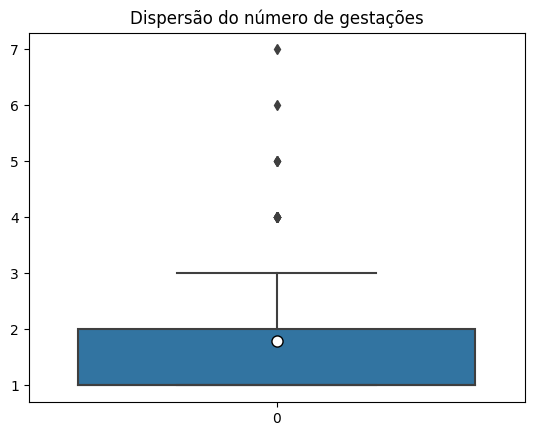

In [30]:
plt.title('Dispersão do número de gestações')
sns.boxplot(df['gest'],showmeans=True,meanprops=default_mean_props)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


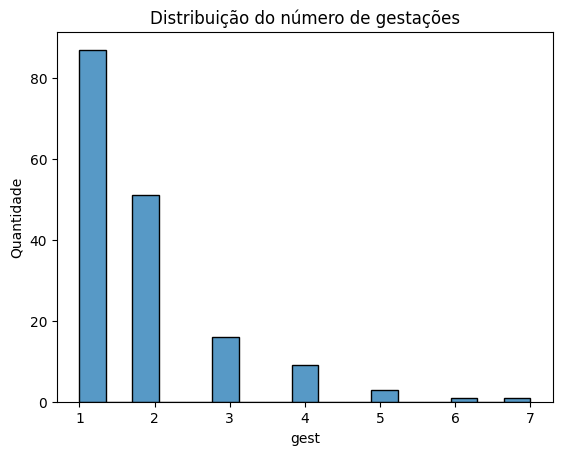

In [31]:
plt.title('Distribuição do número de gestações')
sns.histplot(df['gest'])
plt.ylabel('Quantidade')
plt.show()

In [32]:
len(df.query('gest >= 3.5')) / len(df)

0.08333333333333333

In [33]:
len(df.query('gest > 2')) / len(df)

0.17857142857142858

**As mulheres possuem em média 2 gestações, 17% delas possuem mais que duas gestações tendo um registro máximo de 7 gestações**

**8% dos registros eram outlyers superiores com mais de 3.5 gestações**

# **Paridade**

In [34]:
get_numeric_stats(df['parid'])

,parid
Quantidade,168.000000
Média,0.666667
Mediana,0.000000
Moda,0.000000
Variância,0.966068
Desvio Padrão,0.982888
Coeficiência de Variação,147.433127
Mínimo,0.000000
1° Quartil,0.000000
2° Quartil,0.000000


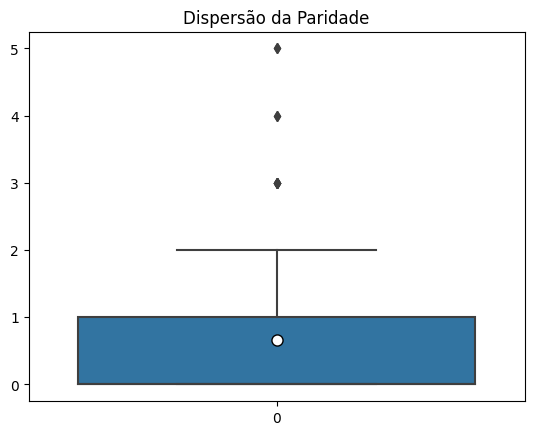

In [35]:
plt.title('Dispersão da Paridade')
sns.boxplot(df['parid'],showmeans=True,meanprops=default_mean_props)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


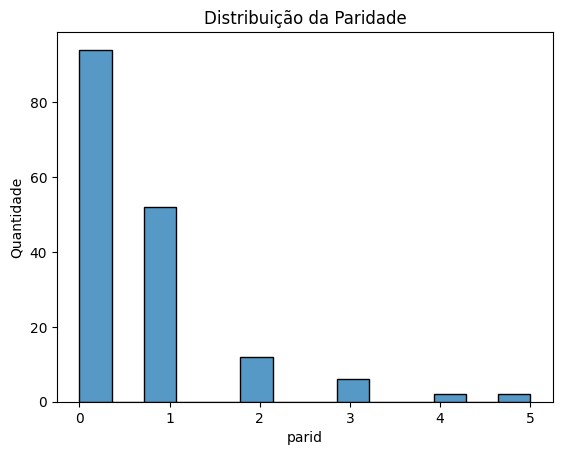

In [36]:
plt.title('Distribuição da Paridade')
sns.histplot(df['parid'])
plt.ylabel('Quantidade')
plt.show()

In [37]:
len(df.query(f'parid >= {2.5}')) / len(df)

0.05952380952380952

**Os valores de paridade estão distribuidos em sua maioria entre 0 e 1, com 75% dos registros tendo no máximo 1, registrando 5% dos valores sendo outlyers supeiores acima do valor de 2.5 (1Q - 1,5 * IIQ)**

# **Aborto**

In [38]:
get_numeric_stats(df['abort'])

,abort
Quantidade,168.000000
Média,0.119048
Mediana,0.000000
Moda,0.000000
Variância,0.129455
Desvio Padrão,0.359799
Coeficiência de Variação,302.231224
Mínimo,0.000000
1° Quartil,0.000000
2° Quartil,0.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


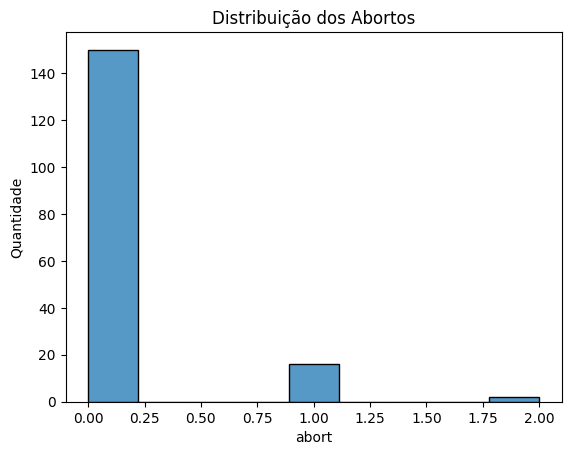

In [39]:
plt.title('Distribuição dos Abortos')
sns.histplot(df['abort'])
plt.ylabel('Quantidade')
plt.show()

In [40]:
len(df.query('abort == 0')) / len(df)

0.8928571428571429

**89% das mulheres não fizerem nenhum aborto, qualquer mulher que tenha feito ao menos 1 aborto foi considerado outlyer superior**

# **Cesária Anterior**

In [41]:
get_quality_stats(df['cesant'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
cesant,,,,
naplic,94,94,0.559524,0.559524
nao,45,139,0.267857,0.827381
sim,29,168,0.172619,1.000000


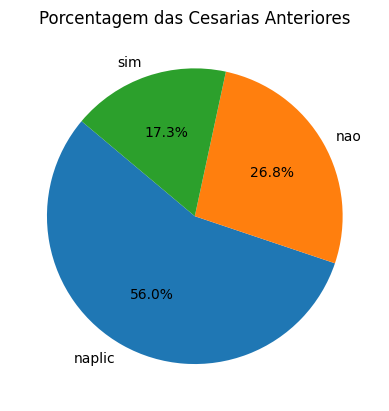

In [42]:
plt.title('Porcentagem das Cesarias Anteriores')
plot_pie_chart(df,'cesant')

**56% dos valores de cesária foram registrados como "naplic", 26,8% como "não" e 17,3% como "sim"**

# **Idade Gestacional**

In [43]:
igest_labels = ['< 40 semanas','>= 40 semanas']
df['igest_label'] = df['igest'].apply(lambda x : igest_labels[x])
get_quality_stats(df['igest_label'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
igest_label,,,,
>= 40 semanas,86,86,0.511905,0.511905
< 40 semanas,82,168,0.488095,1.000000


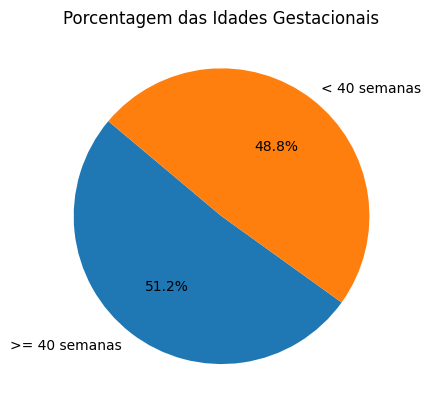

In [44]:
plt.title('Porcentagem das Idades Gestacionais')
plot_pie_chart(df,'igest_label')

**51,2% das gestantes tinham ao menos 40 semanas de gestação enquanto 48,8% possuiam menos que isso**

# **Indicação para indução**

In [45]:
get_quality_stats(df['indinduc'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
indinduc,,,,
naplic,111,111,0.660714,0.660714
rpm,31,142,0.184524,0.845238
oligoam,12,154,0.071429,0.916667
dheg,5,159,0.029762,0.946429
pprolong,4,163,0.023810,0.970238
ciur,1,164,0.005952,0.976190
macrofet,1,165,0.005952,0.982143
meconio,1,166,0.005952,0.988095
hart,1,167,0.005952,0.994048


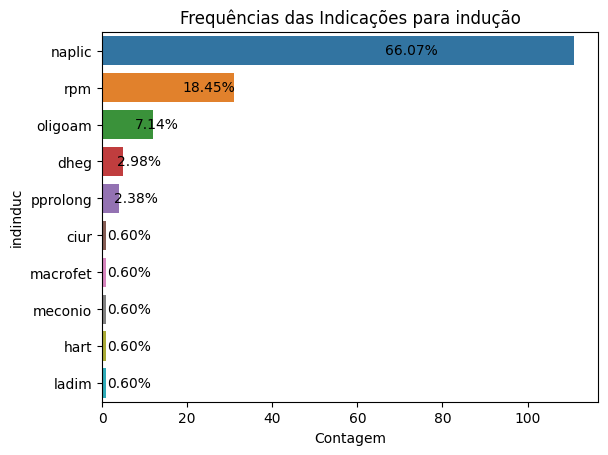

In [46]:
plt.title('Frequências das Indicações para indução')
plt.xlabel('Contagem')
plt.ylabel('Indicação para indução')
plot_count_chart(df,'indinduc')

# **Tempo de parto**

In [47]:
get_numeric_stats(df['tparto'])

,tparto
Quantidade,168.000000
Média,8.029762
Mediana,8.000000
Moda,6.000000
Variância,15.346414
Desvio Padrão,3.917450
Coeficiência de Variação,48.786627
Mínimo,0.000000
1° Quartil,5.000000
2° Quartil,8.000000


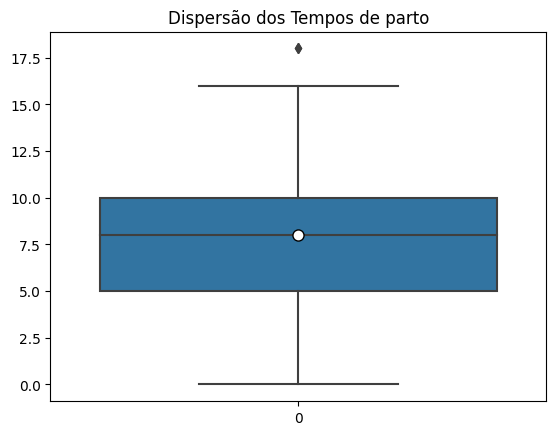

In [48]:
plt.title('Dispersão dos Tempos de parto')
sns.boxplot(df['tparto'],showmeans=True,meanprops=default_mean_props)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


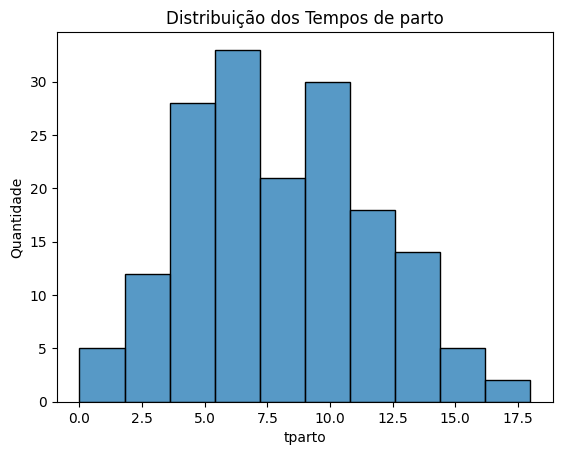

In [49]:
plt.title('Distribuição dos Tempos de parto')
sns.histplot(df['tparto'])
plt.ylabel('Quantidade')
plt.show()

In [50]:
len(df.query('tparto > 8')) / len(df)

0.4107142857142857

In [51]:
limit_max = 10 + (1.5 * 5)
len(df.query(f'tparto >= {limit_max}'))

2

**Em médias as gestantes tiveram 8 horas de trabalho de parto, com uma variação de 48% em relação a esse tempo, 41% das mulheres registraram um tempo maior que 8 horas, tendo 2 registros de outlyers superiores com ao menos 17,5 horas de trabalho de parto**

# **Tempo de Condução**

In [52]:
get_numeric_stats(df['tcond'])

,tcond
Quantidade,168.000000
Média,7.755102
Mediana,7.755102
Moda,7.755102
Variância,1.371624
Desvio Padrão,1.171164
Coeficiência de Variação,15.101846
Mínimo,3.000000
1° Quartil,7.755102
2° Quartil,7.755102


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


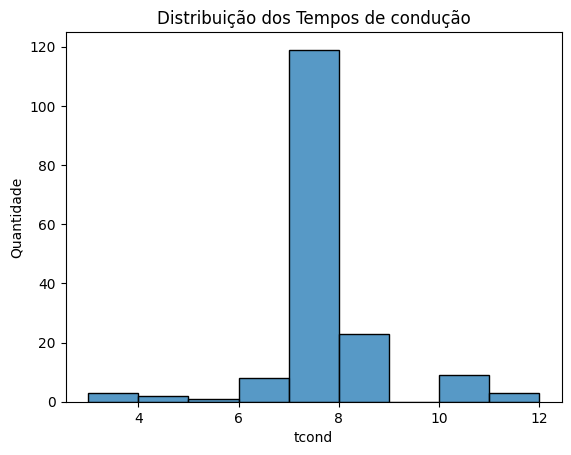

In [53]:
plt.title('Distribuição dos Tempos de condução')
sns.histplot(df['tcond'])
plt.ylabel('Quantidade')
plt.show()

**Em média o tempo de condução foi de 7,7 horas com uma variação de 15% em relação a este tempo, tendo um registro minimo de 3 horas e um máximo de 12 horas**

# **Tempo de indução**

In [54]:
get_numeric_stats(df['tinduc'])

,tinduc
Quantidade,168.000000
Média,13.278689
Mediana,13.278689
Moda,13.278689
Variância,97.378816
Desvio Padrão,9.868071
Coeficiência de Variação,74.315099
Mínimo,0.000000
1° Quartil,12.000000
2° Quartil,13.278689


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


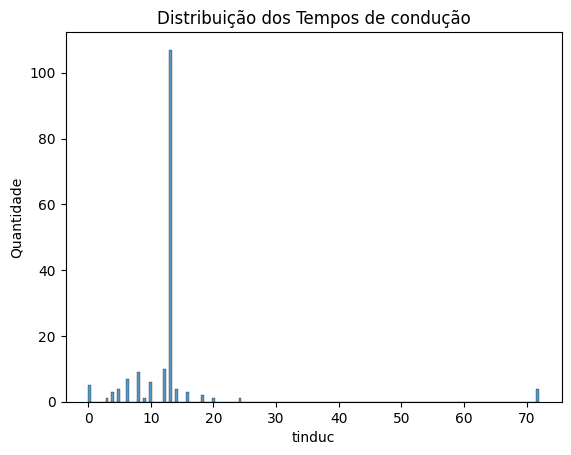

In [55]:
plt.title('Distribuição dos Tempos de condução')
sns.histplot(data=df,x='tinduc')
plt.ylabel('Quantidade')
plt.show()

In [56]:
df.query('tinduc > 0')['tinduc'].min()

3.0

**Em média o tempo de indução foi de 13,27 horas com uma variação de 74% em relação a este tempo, tendo um registro minimo de 3 horas e um máximo de 72 horas**

# **Droga**

In [57]:
df['droga_label'] = df['droga'].apply(lambda x : "Hialuronidase" if x == 'H' else 'Placebo')
get_quality_stats(df['droga_label'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
droga_label,,,,
Placebo,85,85,0.505952,0.505952
Hialuronidase,83,168,0.494048,1.000000


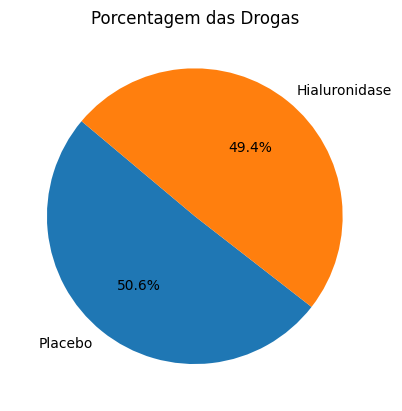

In [58]:
plt.title('Porcentagem das Drogas')
plot_pie_chart(df,'droga_label')

**Os registros de droga estão bem distribuidos/similhares ja que 49,4% das gestantes utilizaram a hialuronidase e 50,6% o placebo**

# **Indices Bishop ao Longo do tempo**

In [59]:
bishop_cols = ['bishop0','bishop24','bishop48','bishop72','bishop96','bishopin']
df_stats = pd.DataFrame(index=['Quantidade', 'Média', 'Mediana', 'Moda', 'Variância', 'Desvio Padrão', 'Coeficiente de Variação', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo', 'Amplitude', 'IIQ', 'Assimetria', 'Kurtose'])

for col in bishop_cols:
    data = df[col]
    stats = {
        'Quantidade': data.count(),
        'Média': data.mean(),
        'Mediana': data.median(),
        'Moda': data.mode()[0],
        'Variância': data.var(),
        'Desvio Padrão': data.std(),
        'Coeficiente de Variação': data.std() / data.mean() * 100,
        'Mínimo': data.min(),
        '1° Quartil': data.quantile(0.25),
        '2° Quartil': data.quantile(0.5),
        '3° Quartil': data.quantile(0.75),
        'Máximo': data.max(),
        'Amplitude': data.max() - data.min(),
        'IIQ': data.quantile(0.75) - data.quantile(0.25),
        'Assimetria': data.skew(),
        'Kurtose': data.kurtosis()
    }
    df_stats[col] = pd.Series(stats)
df_stats

,bishop0,bishop24,bishop48,bishop72,bishop96,bishopin
Quantidade,168.000000,157.000000,142.000000,102.000000,78.000000,168.000000
Média,2.029762,2.878981,3.274648,3.754902,3.858974,5.553571
Mediana,2.000000,3.000000,4.000000,4.000000,4.000000,5.000000
Moda,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
Variância,1.969169,3.581414,3.647438,3.988837,3.551282,4.045017
Desvio Padrão,1.403271,1.892463,1.909827,1.997207,1.884485,2.011223
Coeficiente de Variação,69.134747,65.733764,58.321588,53.189334,48.833819,36.214944
Mínimo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1° Quartil,0.000000,2.000000,2.000000,3.000000,3.000000,4.000000
2° Quartil,2.000000,3.000000,4.000000,4.000000,4.000000,5.000000


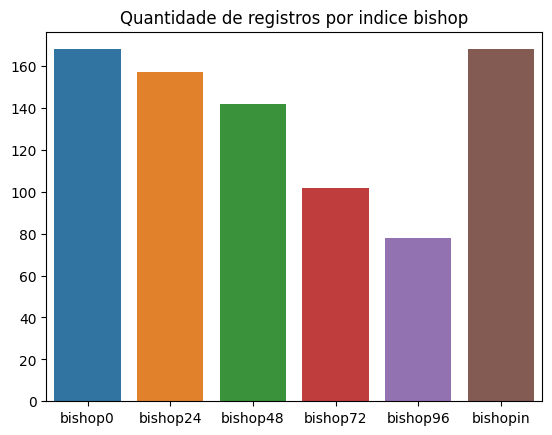

In [60]:
qty = df_stats.iloc[0]
plt.title('Quantidade de registros por indice bishop')
sns.barplot(x=qty.index,y=qty.values)
plt.show()

In [61]:
data = df_stats.iloc[1]
coef_var = data.std() / data.mean() * 100
print(coef_var)

33.22340474441721


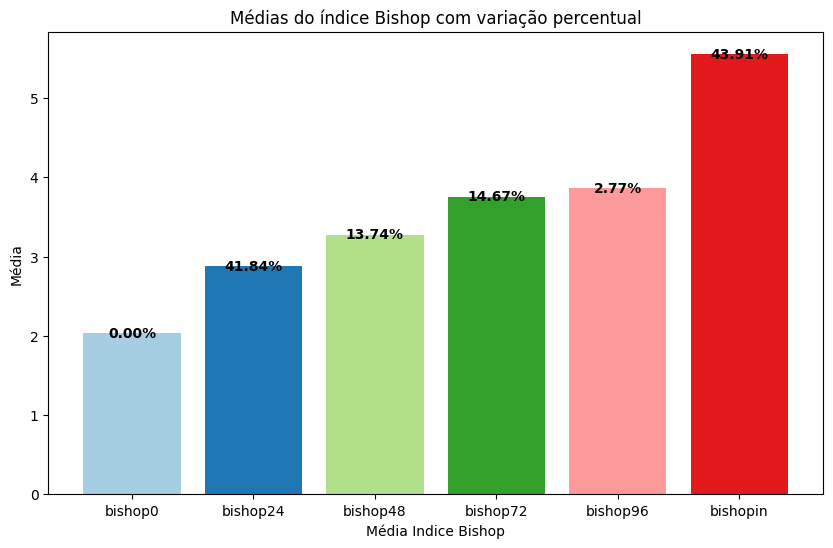

In [62]:
bishop_means = df[bishop_cols].mean()

# Calculate the percentage change from one index to the next
percentage_change = bishop_means.pct_change() * 100
percentage_change.iloc[0] = 0

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for means with different colors and percentage labels
bars = ax.bar(bishop_cols, bishop_means, color=plt.cm.Paired(np.arange(len(bishop_cols))))

# Adding percentage labels on the bars
for bar, pct in zip(bars, percentage_change):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{pct:.2f}%', va='center', ha='center', color='black', fontweight='bold')

ax.set_xlabel('Média Indice Bishop')
ax.set_ylabel('Média')
ax.set_title('Médias do índice Bishop com variação percentual')
plt.show()

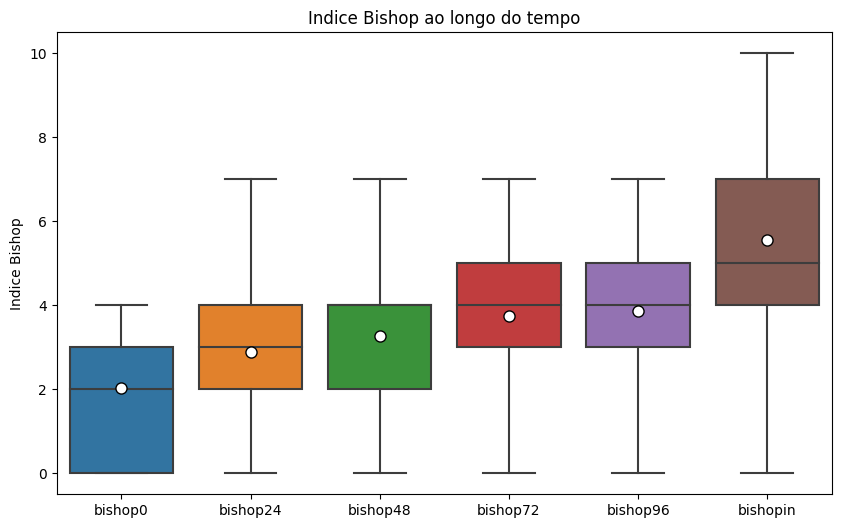

In [63]:
plt.figure(figsize=(10, 6), facecolor='white')
sns.boxplot(data=df[bishop_cols],showmeans=True,meanprops=default_mean_props)
plt.title('Indice Bishop ao longo do tempo')
plt.ylabel('Indice Bishop')
plt.show()

In [64]:
len(df[df['bishop72'].isna()]) / len(df)

0.39285714285714285

In [65]:
len(df[df['bishop96'].isna()]) / len(df)

0.5357142857142857

**Ao decorrer do tempo a média do indice bihop aumenta em torno de 33%, a assimetria aumenta gradativamente mostrando que os indices começam a se distribuir a direita da nossa amostra, ou seja, com valores mais altos.**

**Porém value ressaltar que 40% das gestantes não possuem o registro do indice bishop em 72 horas e 53% não registraram o indice em 96 horas**

**Em média o indice bishop na internação se mantem em 5,5 pontos com uma variação de 36% em torno desse valor (2 pontos), tendo 7 pontos no 3° quartil e um valor maximo de 10 pontos**

# **Efeito colateral**

In [66]:
get_quality_stats(df['colat'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
colat,,,,
nao,141,141,0.839286,0.839286
colica,27,168,0.160714,1.000000


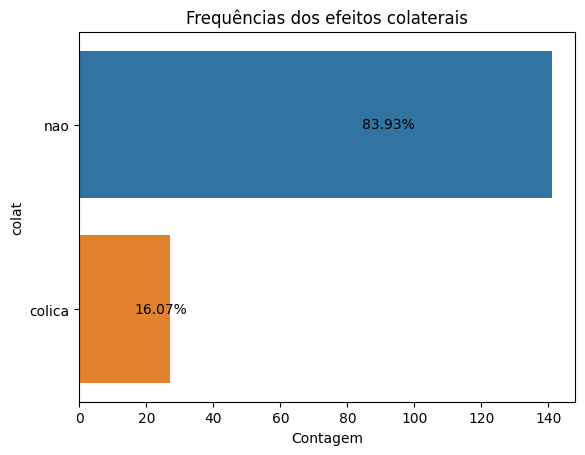

In [67]:
plt.title('Frequências dos efeitos colaterais')
plt.ylabel('Efeito colateral')
plot_count_chart(df,'colat')

**16% das gestantes registraram cólica como efeito colateral, as demais não tiveram nenhum efeito colateral**

**Tipo de parto**

In [68]:
get_quality_stats(df['tipo_parto'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
tipo_parto,,,,
vaginal,111,111,0.660714,0.660714
cesária,57,168,0.339286,1.000000


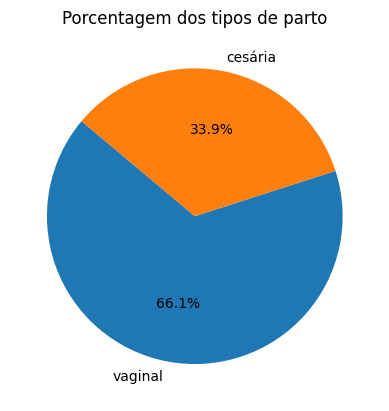

In [69]:
plt.title('Porcentagem dos tipos de parto')
plot_pie_chart(df,'tipo_parto')

**66,1% das mulheres realizaram o parto vaginal e 33,9% fizeram cesáreana**

# **Indicação para cesárea**

In [70]:
get_quality_stats(df['indcesar'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
indcesar,,,,
naplic,111,111,0.660714,0.660714
DF,30,141,0.178571,0.839286
SF,19,160,0.113095,0.952381
DF/SF,3,163,0.017857,0.970238
DCP,3,166,0.017857,0.988095
MF/SF,1,167,0.005952,0.994048
MF,1,168,0.005952,1.000000


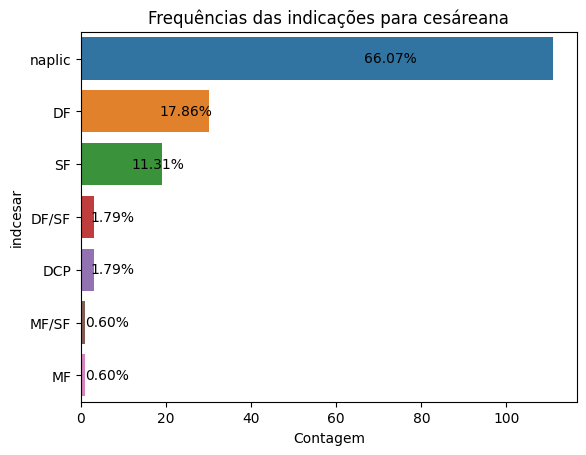

In [71]:
plt.title('Frequências das indicações para cesáreana')
plt.ylabel('Indicação')
plot_count_chart(df,'indcesar')

**66,07% das gestantes registratam "naplic" como indicação para cesárea, 17,86% como "DF", 11,31% como "SF", 1,79% como "DF/SF", 1,79% como "DCP", 0,6% como "MS/SF" e 0,6% como "MF"**

# **Indice Apgar**

In [72]:
apgar_labels = ['>= 7', '< 7']
df['apgar_label'] = df['apgar'].apply(lambda x : apgar_labels[x])
get_quality_stats(df['apgar_label'])

,Frêquencia,Frêquencia Acumulada,Frêquencia Absoluta,Frêquencia Absoluta Acumulada
apgar_label,,,,
< 7,159,159,0.946429,0.946429
>= 7,9,168,0.053571,1.000000


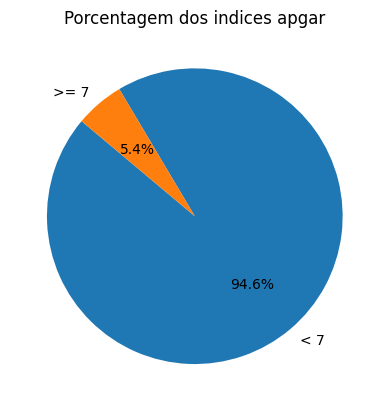

In [73]:
plt.title('Porcentagem dos indices apgar')
plot_pie_chart(df,'apgar_label')

**Apenas 5,4% dos recém-nascidos registraram o indice apgar maior ou igual a 7**

# **5° passo: análise exploratória de 2 ou mais variáveis**

**Daremos foco nas variavéis que serão utilizadas como "variaveis respostas" e "variaveis preditoras"**

# **Correlação entre os indices bishop**

In [74]:
bishop_corr = df[bishop_cols].corr()
bishop_corr

,bishop0,bishop24,bishop48,bishop72,bishop96,bishopin
bishop0,1.000000,0.654775,0.533899,0.389257,0.444456,0.246609
bishop24,0.654775,1.000000,0.842944,0.681505,0.629126,0.590731
bishop48,0.533899,0.842944,1.000000,0.772277,0.719824,0.699294
bishop72,0.389257,0.681505,0.772277,1.000000,0.926506,0.818676
bishop96,0.444456,0.629126,0.719824,0.926506,1.000000,0.816664
bishopin,0.246609,0.590731,0.699294,0.818676,0.816664,1.000000


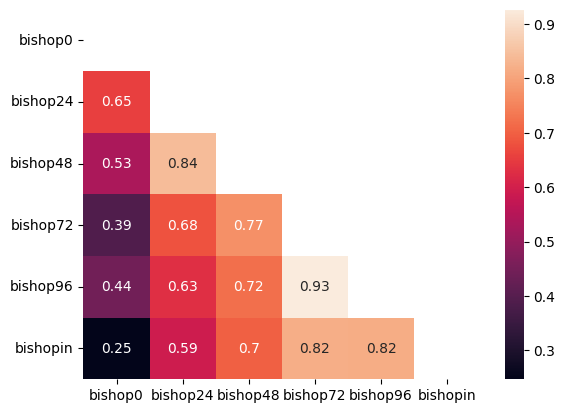

In [75]:
bishop_mask = np.triu(bishop_corr)
sns.heatmap(bishop_corr,annot=True,mask=bishop_mask)
plt.show()

**Analisando a ultima diagonal da matriz de correlaçao, vemos que cada indice bishop possui uma correlação moderada/forte com o indice anterior, ou seja:**

* o indice bishop em 24 horas possui uma correlação de 0.65 com o indice inicial
* o indice bishop em 48 horas possui uma correlação de 0.84 com o indice em 24 horas
* o indice bishop em 72 horas possui uma correlação de 0.77 com o indice em 48 horas
* o indice bishop em 96 horas possui uma correlação de 0.93 com o indice em 72 horas horas
* o indice bishop na internação possui uma correlação de 0.82 com o indice em 96 horas horas

# **Estatististica da coluna bishopin comparado por droga**

In [76]:
drug_cols = df['droga_label'].unique()
df_stats = pd.DataFrame(index=['Quantidade', 'Média', 'Mediana', 'Moda', 'Variância', 'Desvio Padrão', 'Coeficiente de Variação', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo', 'Amplitude', 'IIQ', 'Assimetria', 'Kurtose'])

for drug in drug_cols:
    data = df.query(f'droga_label == "{drug}"')['bishopin']
    stats = {
        'Quantidade': data.count(),
        'Média': data.mean(),
        'Mediana': data.median(),
        'Moda': data.mode()[0],
        'Variância': data.var(),
        'Desvio Padrão': data.std(),
        'Coeficiente de Variação': data.std() / data.mean() * 100,
        'Mínimo': data.min(),
        '1° Quartil': data.quantile(0.25),
        '2° Quartil': data.quantile(0.5),
        '3° Quartil': data.quantile(0.75),
        'Máximo': data.max(),
        'Amplitude': data.max() - data.min(),
        'IIQ': data.quantile(0.75) - data.quantile(0.25),
        'Assimetria': data.skew(),
        'Kurtose': data.kurtosis()
    }
    df_stats[drug] = pd.Series(stats)
df_stats

,Hialuronidase,Placebo
Quantidade,83.000000,85.000000
Média,6.759036,4.376471
Mediana,7.000000,4.000000
Moda,8.000000,4.000000
Variância,2.502204,2.761345
Desvio Padrão,1.581836,1.661729
Coeficiente de Variação,23.403272,37.969623
Mínimo,2.000000,0.000000
1° Quartil,6.000000,3.000000
2° Quartil,7.000000,4.000000


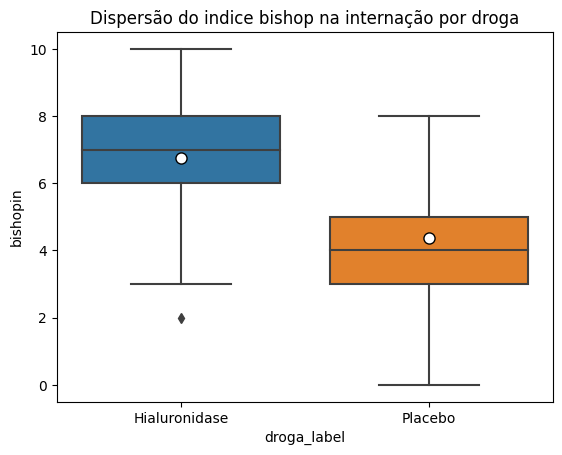

In [77]:
plt.title('Dispersão do indice bishop na internação por droga')
sns.boxplot(data=df,y='bishopin',x='droga_label',showmeans=True,meanprops=default_mean_props)
plt.show()

**Percebe-se que a média do indice bishop ao usar a hialuronidase é maior e a assimetria da distribuição é de -0.57, ou seja, temos uma concentração de valores a direita da distribuição**

* média com uso da hialuronidase: 6.75
* média com uso do placebo: 4.37

# **Média de cada índice por droga**

In [78]:
mean_bishop_per_drug = df.groupby('droga_label')[bishop_cols].mean()
mean_bishop_per_drug

,bishop0,bishop24,bishop48,bishop72,bishop96,bishopin
droga_label,,,,,,
Hialuronidase,1.975904,3.702703,4.269841,5.459459,5.636364,6.759036
Placebo,2.082353,2.144578,2.481013,2.784615,3.160714,4.376471


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

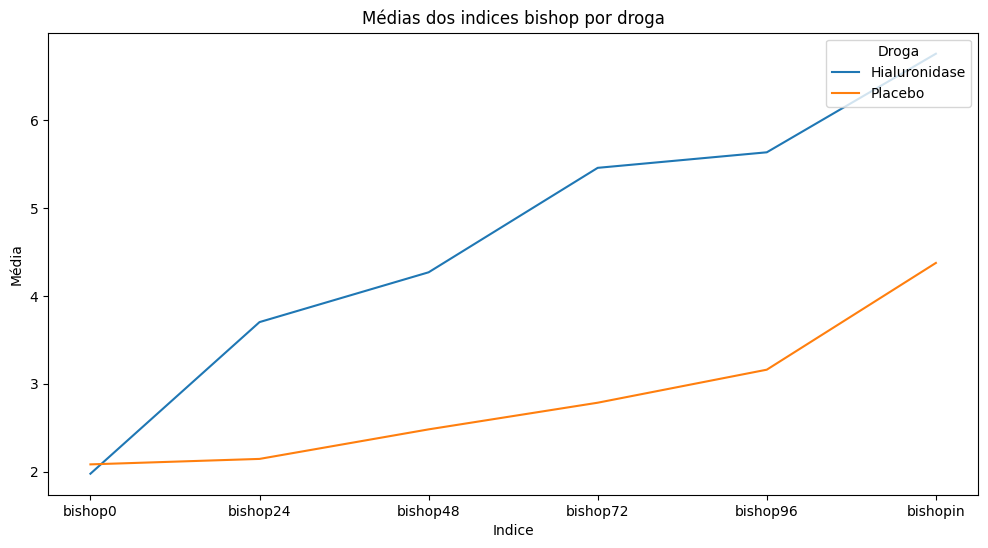

In [79]:
# Reorganizar o DataFrame para que as colunas se tornem índices
stacked_bishop_mean_per_drug = mean_bishop_per_drug.stack().reset_index()
stacked_bishop_mean_per_drug.columns = ['droga', 'indice', 'media']

# Plotar o gráfico de linha com as médias de cada coluna, comparando com a variável 'droga'
plt.figure(figsize=(12, 6))
sns.lineplot(data=stacked_bishop_mean_per_drug, x='indice', y='media', hue='droga')
plt.title('Médias dos indices bishop por droga')
plt.xlabel('Indice')
plt.ylabel('Média')
plt.legend(title='Droga', loc='upper right')
plt.show()

**Percebe-se que o indice bishop cresce ao decorrer do tempo nas duas drogas, porém a Hialuronidase possui resultados melhores comparados ao Placebo**

# **Droga com tipo de parto**

In [80]:
pd.crosstab(df['tipo_parto'],df['droga_label'],margins=True,margins_name='Total')

droga_label,Hialuronidase,Placebo,Total
tipo_parto,,,
cesária,15,42,57
vaginal,68,43,111
Total,83,85,168


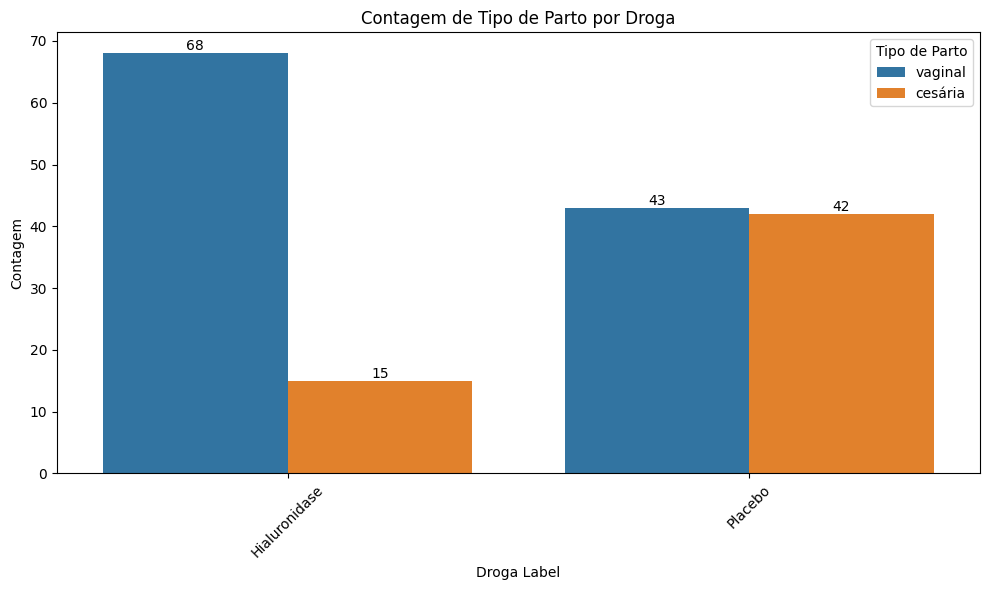

In [81]:
# sns.countplot(data=df,hue='tipo_parto',x='droga_label')
# plt.show()
# Calcular as contagens por categoria
contagens = df.groupby(['droga_label', 'tipo_parto']).size().reset_index(name='contagem')

# Calcular as contagens totais por droga
contagem_total_por_droga = df.groupby('droga_label').size()

# Calcular as porcentagens para cada categoria
contagens['porcentagem'] = contagens.apply(lambda row: (row['contagem'] / contagem_total_por_droga[row['droga_label']]) * 100, axis=1)

# Plotar o gráfico de contagem
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, hue='tipo_parto', x='droga_label')

# Adicionar as porcentagens às barras
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{y:.0f}', (x, y), ha='center', va='bottom')

plt.title('Contagem de Tipo de Parto por Droga')
plt.xlabel('Droga Label')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Parto')
plt.tight_layout()
plt.show()

**81% das mulheres que usaram a hialuronidase realizaram o parto vaginal, enquanto que 49% das mulheres que usaram o placebo realizaram o parto vaginal**

# **Droga por tempo de indução**

In [96]:
drug_cols = df['droga_label'].unique()
df_stats = pd.DataFrame(index=['Quantidade', 'Média', 'Mediana', 'Moda', 'Variância', 'Desvio Padrão', 'Coeficiente de Variação', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo', 'Amplitude', 'IIQ', 'Assimetria', 'Kurtose'])

for drug in drug_cols:
    data = df.query(f'droga_label == "{drug}"')['tinduc']
    stats = {
        'Quantidade': data.count(),
        'Média': data.mean(),
        'Mediana': data.median(),
        'Moda': data.mode()[0],
        'Variância': data.var(),
        'Desvio Padrão': data.std(),
        'Coeficiente de Variação': data.std() / data.mean() * 100,
        'Mínimo': data.min(),
        '1° Quartil': data.quantile(0.25),
        '2° Quartil': data.quantile(0.5),
        '3° Quartil': data.quantile(0.75),
        'Máximo': data.max(),
        'Amplitude': data.max() - data.min(),
        'IIQ': data.quantile(0.75) - data.quantile(0.25),
        'Assimetria': data.skew(),
        'Kurtose': data.kurtosis()
    }
    df_stats[drug] = pd.Series(stats)
df_stats

,Hialuronidase,Placebo
Quantidade,83.000000,85.000000
Média,10.981829,15.521504
Mediana,13.278689,13.278689
Moda,13.278689,13.278689
Variância,14.633884,169.010036
Desvio Padrão,3.825426,13.000386
Coeficiente de Variação,34.834143,83.757255
Mínimo,0.000000,0.000000
1° Quartil,8.000000,13.278689
2° Quartil,13.278689,13.278689


**A análise dos dados indica que o grupo tratado com Hialuronidase demonstra tempos de indução do parto mais curtos e consistentes, com uma média de 10.98 horas em comparação com 15.52 horas para o grupo Placebo. Além disso, o grupo Hialuronidase exibe uma variabilidade menor, conforme evidenciado pelo desvio padrão e coeficiente de variação mais baixos. Embora ambos os grupos tenham medianas idênticas, a Hialuronidase apresenta uma distribuição de dados mais concentrada em torno da mediana, indicando uma maior consistência nos resultados. Esses achados sugerem que a Hialuronidase pode ser uma opção mais eficaz e previsível para a indução do parto em comparação com o Placebo.**

# **6° passo: Regressão Linear usando a variavel bishopin como resposta**

**Dropando colunas de labels e outros indices bishop**

In [83]:
data = df.drop(columns=['esc_label','igest_label','droga_label','apgar_label','bishop0','bishop24','bishop48','bishop72','bishop96'])

**Transformando colunas qualitativas em quantitaivas discretas**

In [84]:
cat_cols = data.select_dtypes(object).columns
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

**Separando as variaveis entre preditoras (x) e respostas (y)**

In [85]:
x = data.drop(columns='bishopin')
y = data['bishopin']

**Criando o modelo de regressão linear em torno dos nossos dados**

In [86]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

**Analisando o modelo**

In [87]:
print('Intercepto: ',model.intercept_)

Intercepto:  8.289149456156226


In [88]:
pd.DataFrame({
    'coluna': x.columns,
    'coeficiente':model.coef_
})

,coluna,coeficiente
0,idade,-0.040216
1,raca,0.154263
2,ecivil,0.033756
3,prof,0.032769
4,esc,-0.023622
5,gest,-0.043528
6,parid,0.057122
7,abort,-0.055074
8,cesant,-0.214667
9,igest,-0.552425


In [89]:
print('R Quadrado: ', model.score(x, y))

R Quadrado:  0.585366289228616


In [90]:
y_preds = model.predict(x)
mse = mean_squared_error(y,y_preds)
print('Erro médio quadrático: ', mse)

Erro médio quadrático:  1.667217117854027


In [91]:
mae = mean_absolute_error(y,y_preds)
print('Erro médio absoluto: ', mae)

Erro médio absoluto:  1.0396789463290015


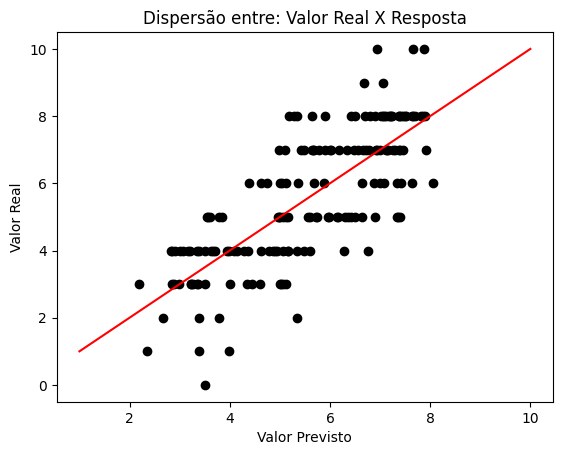

In [92]:
plt.title('Dispersão entre: Valor Real X Resposta')
plt.scatter(y_preds,y,color='black')
plt.plot([1, max(y)], [1, max(y)], color='red')

# Adicionar rótulos aos eixos
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.show()